In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [6]:
# Import the requests library.
import requests

# Import the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datatime library.
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santo antonio do leverger
Processing Record 2 of Set 1 | cavan
Processing Record 3 of Set 1 | asau
Processing Record 4 of Set 1 | waverly
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | coihueco
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | san lawrenz
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | bonfim
Processing Record 13 of Set 1 | egvekinot
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | jalu
Processing Record 17 of Set 1 | yerbogachen
Processing Record 18 of Set 1 | mbandaka
Processing Record 19 of Set 1 | marsh harbour
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | srednekolymsk

Processing Record 37 of Set 4 | pringsewu
Processing Record 38 of Set 4 | touros
Processing Record 39 of Set 4 | ponta do sol
Processing Record 40 of Set 4 | jinchang
Processing Record 41 of Set 4 | cidreira
Processing Record 42 of Set 4 | okitipupa
Processing Record 43 of Set 4 | doctor pedro p. pena
City not found. Skipping...
Processing Record 44 of Set 4 | vaini
Processing Record 45 of Set 4 | tuktoyaktuk
Processing Record 46 of Set 4 | marystown
Processing Record 47 of Set 4 | severo-kurilsk
Processing Record 48 of Set 4 | sitio novo do tocantins
Processing Record 49 of Set 4 | sikeston
Processing Record 50 of Set 4 | terekli-mekteb
Processing Record 1 of Set 5 | ewa beach
Processing Record 2 of Set 5 | ishigaki
Processing Record 3 of Set 5 | lorengau
Processing Record 4 of Set 5 | beyneu
Processing Record 5 of Set 5 | maningrida
Processing Record 6 of Set 5 | basco
Processing Record 7 of Set 5 | golovino
Processing Record 8 of Set 5 | manbij
Processing Record 9 of Set 5 | biak
Pr

Processing Record 28 of Set 8 | salina
Processing Record 29 of Set 8 | vila velha
Processing Record 30 of Set 8 | ayagoz
Processing Record 31 of Set 8 | kautokeino
Processing Record 32 of Set 8 | sorong
Processing Record 33 of Set 8 | aporawan
City not found. Skipping...
Processing Record 34 of Set 8 | aksarka
Processing Record 35 of Set 8 | dharchula
Processing Record 36 of Set 8 | constitucion
Processing Record 37 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 38 of Set 8 | namatanai
Processing Record 39 of Set 8 | dimona
Processing Record 40 of Set 8 | port-gentil
Processing Record 41 of Set 8 | whitehorse
Processing Record 42 of Set 8 | kuusamo
Processing Record 43 of Set 8 | naron
Processing Record 44 of Set 8 | kargasok
Processing Record 45 of Set 8 | mergui
City not found. Skipping...
Processing Record 46 of Set 8 | baruun-urt
Processing Record 47 of Set 8 | komsomolskiy
Processing Record 48 of Set 8 | impfondo
Processing Record 49 of Set 8 | iisalmi
Processin

Processing Record 13 of Set 12 | yangambi
Processing Record 14 of Set 12 | rauma
Processing Record 15 of Set 12 | hue
Processing Record 16 of Set 12 | west wendover
Processing Record 17 of Set 12 | russell
Processing Record 18 of Set 12 | qiqihar
Processing Record 19 of Set 12 | dandong
Processing Record 20 of Set 12 | nara
Processing Record 21 of Set 12 | vydrino
Processing Record 22 of Set 12 | morristown
Processing Record 23 of Set 12 | puerto escondido
Processing Record 24 of Set 12 | mrirt
City not found. Skipping...
Processing Record 25 of Set 12 | wanxian
Processing Record 26 of Set 12 | bargal
City not found. Skipping...
Processing Record 27 of Set 12 | aklavik
Processing Record 28 of Set 12 | ketchikan
Processing Record 29 of Set 12 | sunrise manor
Processing Record 30 of Set 12 | kysyl-syr
Processing Record 31 of Set 12 | pyaozerskiy
Processing Record 32 of Set 12 | darovskoy
Processing Record 33 of Set 12 | birobidzhan
Processing Record 34 of Set 12 | sarangani
Processing Re

In [10]:
len(city_data)

573

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santo Antonio Do Leverger,-15.8656,-56.0767,89.98,53,83,8.25,BR,2022-02-04 15:47:16
1,Cavan,53.9908,-7.3606,39.42,80,60,12.80,IE,2022-02-04 15:47:17
2,Asau,46.4333,26.4000,36.52,81,90,5.44,RO,2022-02-04 15:47:17
3,Waverly,42.7392,-84.6208,12.00,74,20,8.05,US,2022-02-04 15:47:17
4,Jamestown,42.0970,-79.2353,20.52,65,100,5.01,US,2022-02-04 15:43:14
5,Hilo,19.7297,-155.0900,67.24,76,0,6.91,US,2022-02-04 15:47:18
6,Coihueco,-36.6167,-71.8333,72.34,56,20,9.22,CL,2022-02-04 15:47:18
7,Ushuaia,-54.8000,-68.3000,49.66,50,0,17.27,AR,2022-02-04 15:47:18
8,San Lawrenz,36.0553,14.2040,60.21,82,6,4.00,MT,2022-02-04 15:47:19
9,Punta Arenas,-53.1500,-70.9167,51.91,43,0,10.36,CL,2022-02-04 15:47:19


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Santo Antonio Do Leverger,BR,2022-02-04 15:47:16,-15.8656,-56.0767,89.98,53,83,8.25
1,Cavan,IE,2022-02-04 15:47:17,53.9908,-7.3606,39.42,80,60,12.80
2,Asau,RO,2022-02-04 15:47:17,46.4333,26.4000,36.52,81,90,5.44
3,Waverly,US,2022-02-04 15:47:17,42.7392,-84.6208,12.00,74,20,8.05
4,Jamestown,US,2022-02-04 15:43:14,42.0970,-79.2353,20.52,65,100,5.01
5,Hilo,US,2022-02-04 15:47:18,19.7297,-155.0900,67.24,76,0,6.91
6,Coihueco,CL,2022-02-04 15:47:18,-36.6167,-71.8333,72.34,56,20,9.22
7,Ushuaia,AR,2022-02-04 15:47:18,-54.8000,-68.3000,49.66,50,0,17.27
8,San Lawrenz,MT,2022-02-04 15:47:19,36.0553,14.2040,60.21,82,6,4.00
9,Punta Arenas,CL,2022-02-04 15:47:19,-53.1500,-70.9167,51.91,43,0,10.36


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

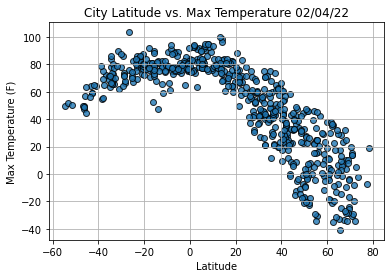

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats, 
            max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

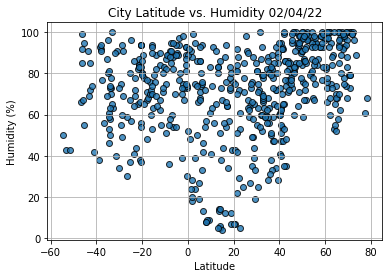

In [16]:
# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats, 
            humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

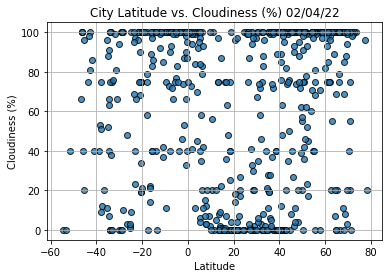

In [17]:
# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats, 
            cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

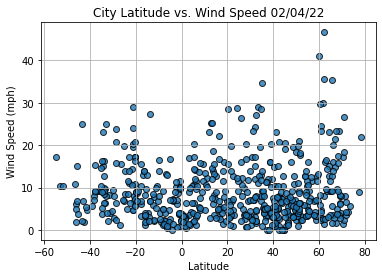

In [18]:
# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats, 
            wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data.
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Atuona
Country                        PF
Date          2022-02-04 15:47:07
Lat                          -9.8
Lng                     -139.0333
Max Temp                    78.37
Humidity                       75
Cloudiness                     11
Wind Speed                  16.46
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Cavan,IE,2022-02-04 15:47:17,53.9908,-7.3606,39.42,80,60,12.80
2,Asau,RO,2022-02-04 15:47:17,46.4333,26.4000,36.52,81,90,5.44
3,Waverly,US,2022-02-04 15:47:17,42.7392,-84.6208,12.00,74,20,8.05
4,Jamestown,US,2022-02-04 15:43:14,42.0970,-79.2353,20.52,65,100,5.01
5,Hilo,US,2022-02-04 15:47:18,19.7297,-155.0900,67.24,76,0,6.91


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

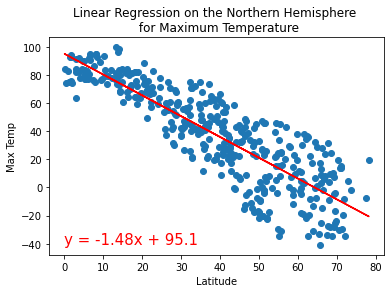

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,-40))

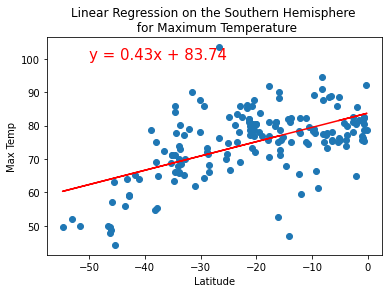

In [34]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,100))

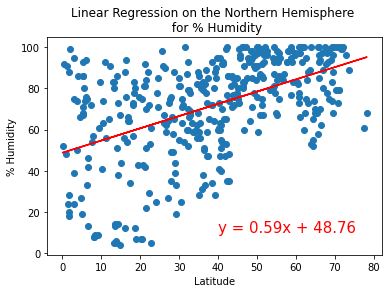

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

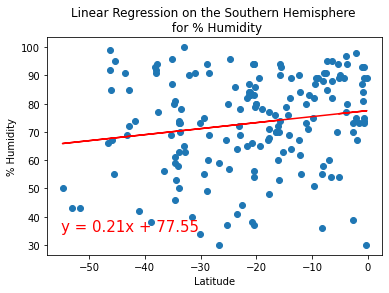

In [42]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,35))

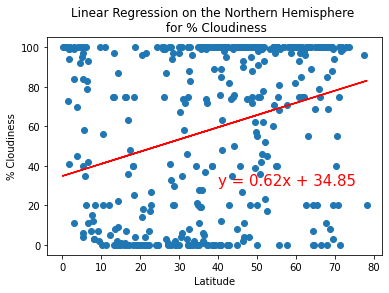

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,30))

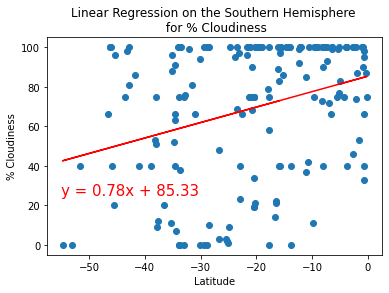

In [48]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,25))

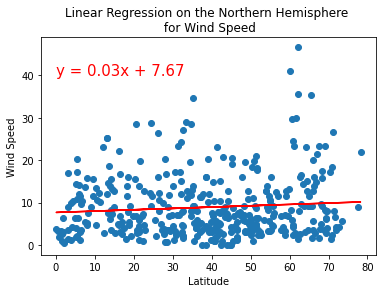

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,40))

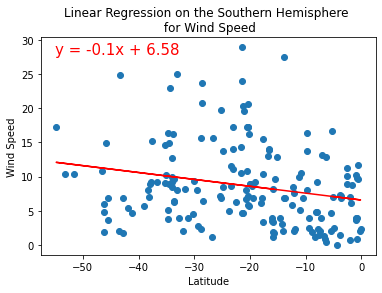

In [55]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,28))